<a href="https://colab.research.google.com/github/aavasna/HousingPricePrediction/blob/main/Predicting%20California%20House%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting California House Prices**

#**Abstract:**

This research aims to predict the median house value in California using various features and assess the performance of different regression models. The dataset comprises information on median houses in California districts, including features such as median income, house age, total rooms, population, and geographical coordinates. The models evaluated include linear regression, decision tree regression, random forest regression, gradient boosting regression, and a baseline model.

Results show that the random forest regression model performs the best, exhibiting the lowest average root mean square error (RMSE). This model captures complex patterns and reduces overfitting by combining multiple decision trees. Linear regression and decision tree models exhibit weaker performance due to their limitations in capturing non-linear relationships and overfitting tendencies, respectively. Gradient boosting models demonstrate high prediction accuracy and outperform basic models.

These findings emphasize the importance of employing advanced regression techniques, such as random forest and gradient boosting, for accurate median house value predictions. The results provide insights into the factors influencing house prices and contribute to estimating house values based on given features. Further research can explore additional features and advanced modeling techniques to enhance prediction accuracy in real estate valuation tasks.

## **Motivation:**

California Housing Data was first used in the paper ”Sparse spatial autoregressions." It contains useful information on the house price to help us understand how does it is impacted. Chen also used various models to analyse and forecast median house prices and found out that Random Forest performed the best, although it also took the longest training time.

In this project, our aim is to predict the median price of household in a block given suitable features provided and compare multiple models to find the best one.

#**Introduction:**

The principal goal of my investigation is to predict the median house value in California based on the given features. This can help us understand the factors that influence house prices i.e. I want to see what features actually affect house prices, in what ways and to what degree. This can potentially assist in estimating the value of a house in a given area.
This is a regression problem because we are trying to predict a numeric target: the median house value in California.
The dataset is a collection of information about median houses in a block in districts in California along with some summary statistics based on the 1990 census data. It includes features such as median house value, median income, median age of houses, total rooms, total bedrooms, population, households, latitude, longitude, and distance to the coast.
The dataset contains 20,640 instances and 10 features.

**Features Summary:**
1. Latitude: Longitude value for the block in California, USA i.e. a measure of how far north a house is; a higher value is farther north [°]
2. Longitude: Latitude value for the block in California, USA i.e. a measure of how far west a house is; a higher value is farther west [°]
3. Median Age: Median age of a house within a block; a lower number is a newer building (measured in years)
4. total_rooms: Count of the total number of rooms (excluding bedrooms) in all houses in the block
5. total_bedrooms: Count of the total number of bedrooms in all houses in the block
6. Population: Total number of people residing in the block (number)
7. Households: Total number of households (a group of people residing within a home unit) for a block (number)
8. Median Income: Median income for households in the block (measured in tens of thousands of US Dollars)
9. ocean_proximity: Type of the landscape of the block [ 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
10. median_house_value: This is the target variable.

# **Introduction to data:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/aavasna/csv_data/main/housing.csv'
df = pd.read_csv(url)

df.shape

(20640, 10)

### Here, we can see that the dataset has 20640 instances and 10 features, including the target variable.

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Firstly, we check if there are any null or missing values. In this case, we see that there are some missing values for total_bedrooms (207 instances).
### Next, 9 of the 10 attributes here are continuous except for the attribute 'ocean_proximity' which is categorical. We know that regression algorithms don't work well with categorical data so we need to modify that as well.



Moving target value to the front of the dataframe to make it easier for data manipulation and analysis later.

In [ ]:
target = df.columns[-2]
df = pd.concat([df[target], df.drop(target, axis=1)], axis=1)

In [ ]:
df.describe()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,115395.615874,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,14999.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,119600.000000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,179700.000000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,264725.000000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,500001.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


##**Working with categorical data**:

In [ ]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
dummies = pd.get_dummies(df.ocean_proximity)
df[dummies.columns] = dummies
df.head(5)
df = df.drop(['ocean_proximity', 'ISLAND'], axis='columns')

Here, we did **one hot encoding**. We introduced a new column for every feature attribute value for 'ocean_proximity' and then dropped the original column and one of the newer columns 'ISLAND' (which only had 5 observations) to avoid issues of multicollinearity.

## **Exploring data:**

### Distribution of target variable - Median House Value:

<Axes: >

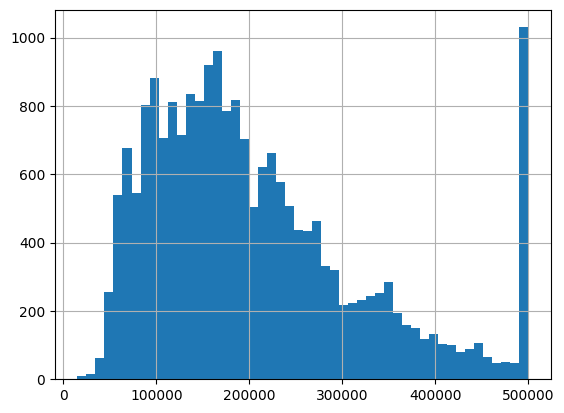

In [ ]:
df['median_house_value'].hist(bins=50)


Here, we can see that there are a lot of values at 500,000 and that this is also the farthest end of values i.e. the maximum value of a house is capped at 500,000. This could be because when the data was collected, anything above it was also recorded as 500,000.

Other than those outliers, the data seems to be right skewed.

### Distribution of other features

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>]], dtype=object)

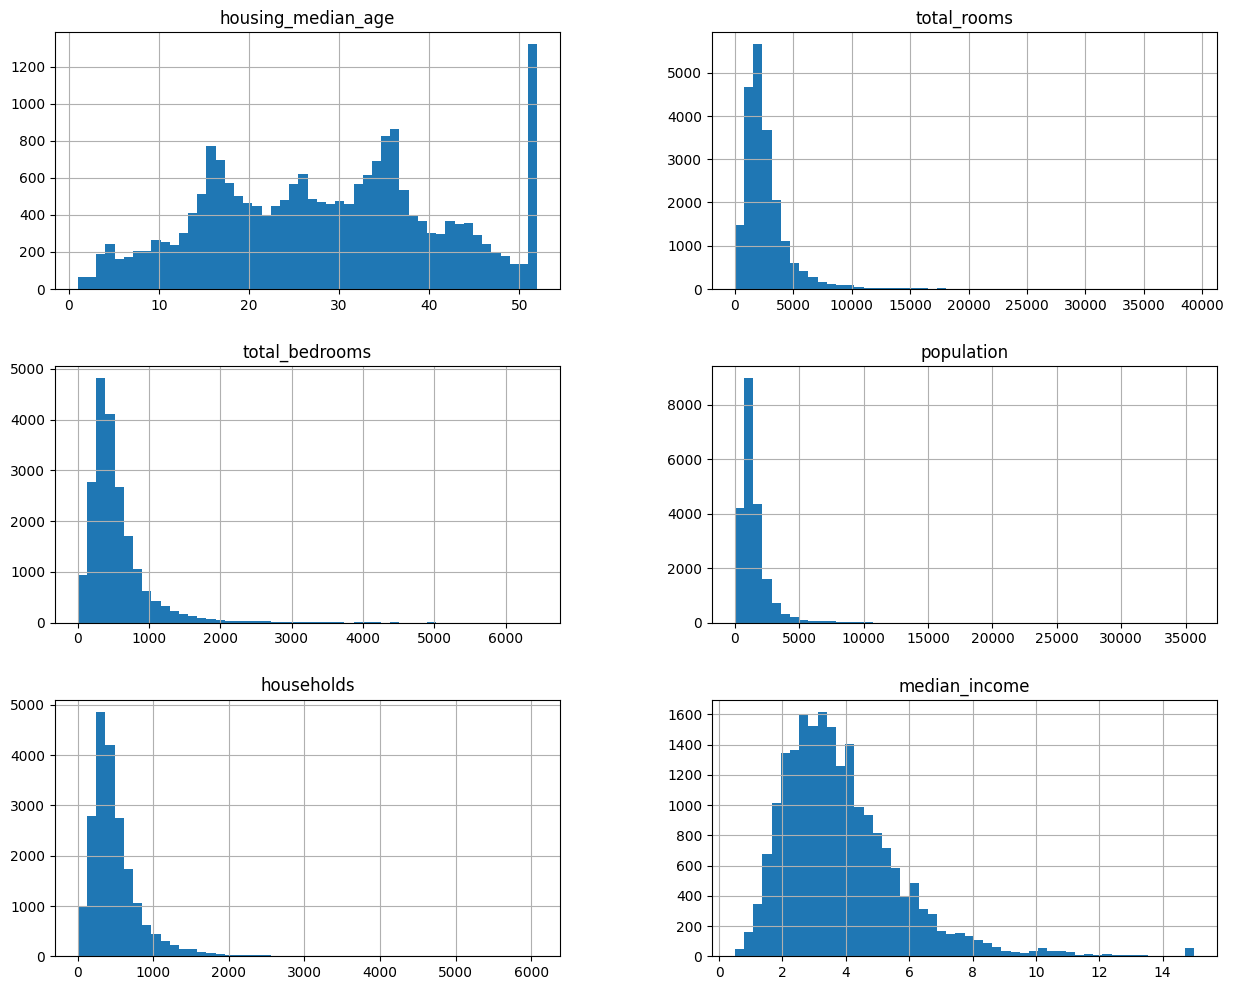

In [ ]:
df_display = df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
df_display.hist(bins=50, figsize=(15,12))

### We also want to look at the distribution of other variables here.

For **housing_median_age**, we see the same issue we saw with median_house_value. So, it could be due to a similar reason during data collection.

For **median_income**, we can see a few outliers at the right end.

The rest of the histograms are right-skewed so we might want to use median rather than mean to describe the center of the data.

### Exploring data visually:

<Axes: xlabel='longitude', ylabel='latitude'>

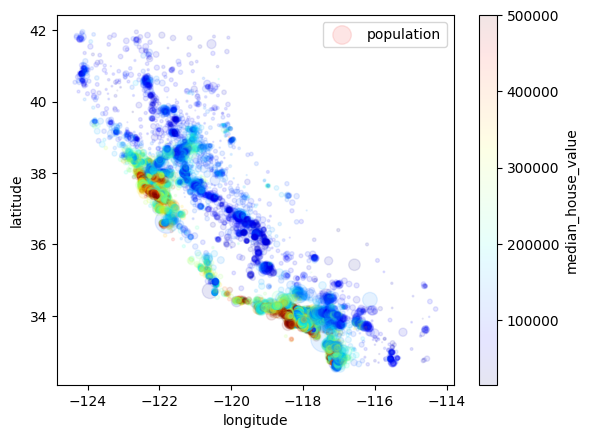

In [ ]:
df.plot(kind="scatter", x="longitude",y="latitude", alpha = 0.1,
        s=df['population']/100, label = 'population', c='median_house_value', cmap=plt.get_cmap("jet"))

Since the latitude and longitude values are actual location indicators, we can plot them to visually analyze some of the data. Here, we have divided the population by 100 so that we can see the points better.

As we can see, the 20,000+  data points form a rough shape of the map of the state of California where each point is a district.

We can see that the districts with higher population closer to the ocean have the highest prices.

### **Correlation** between variables:

In [ ]:
df.corr()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
median_house_value,1.000000,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,0.256617,-0.484859,0.160284,0.141862
longitude,-0.045967,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,0.321121,-0.055575,-0.474489,0.045509
latitude,-0.144160,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,0.358771,-0.160818
housing_median_age,0.105623,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.255172,0.021622
total_rooms,0.134153,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.023022,-0.009175
total_bedrooms,0.049686,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.019873,0.000679
population,-0.024650,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.060880,-0.024264
households,0.065843,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.010093,0.001714
median_income,0.688075,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.168876,-0.237496,0.056197,0.027344
<1H OCEAN,0.256617,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.314813,-0.342620


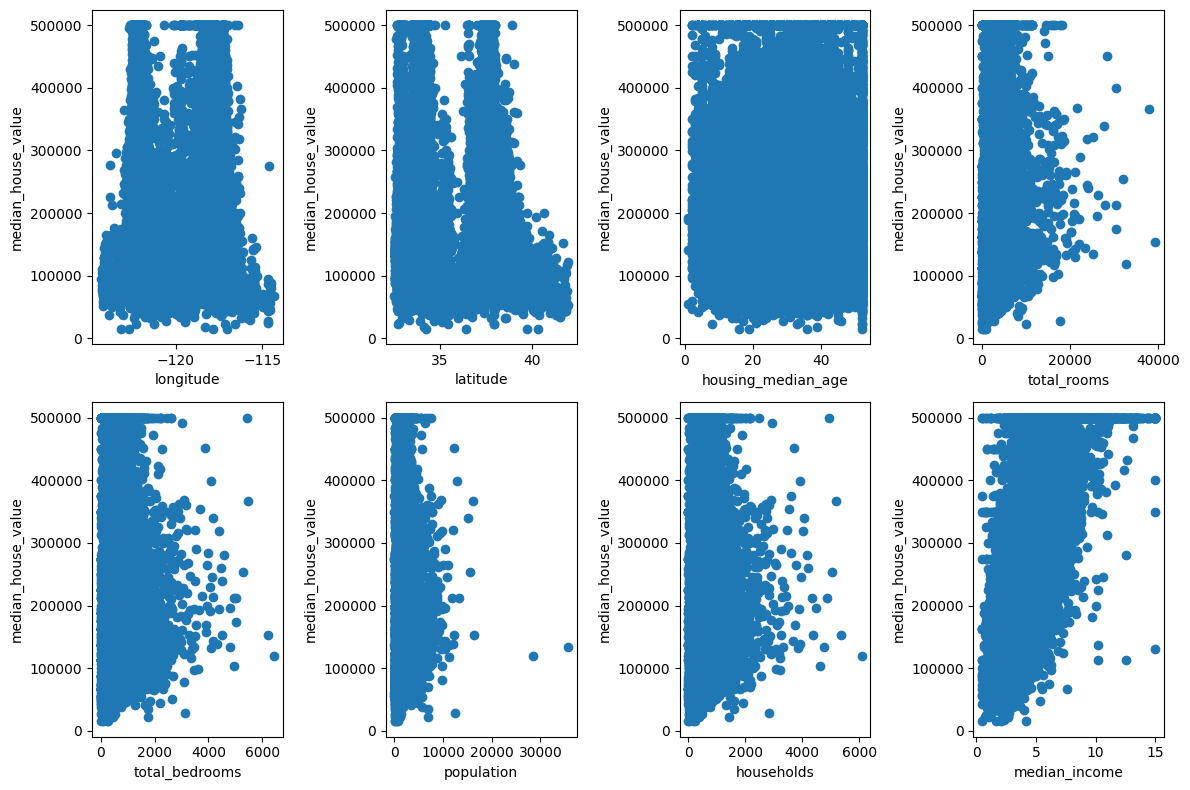

In [ ]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income' ]
target = 'median_house_value'

num_features = len(features)
num_rows = num_features // 3
num_cols = (num_features + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
for i, feature in enumerate(features):
  row = i // num_cols
  col = i % num_cols
  axes[row,col].scatter(df[feature], df[target])
  axes[row,col].set_xlabel(feature)
  axes[row,col].set_ylabel(target)


plt.tight_layout()

plt.show()

### We observe that there are no clear linear relationships between all the predictors and the respondent. Only linear trends shows in median_income. It might make sense that non-linear models might perform better than linear ones.

<Axes: >

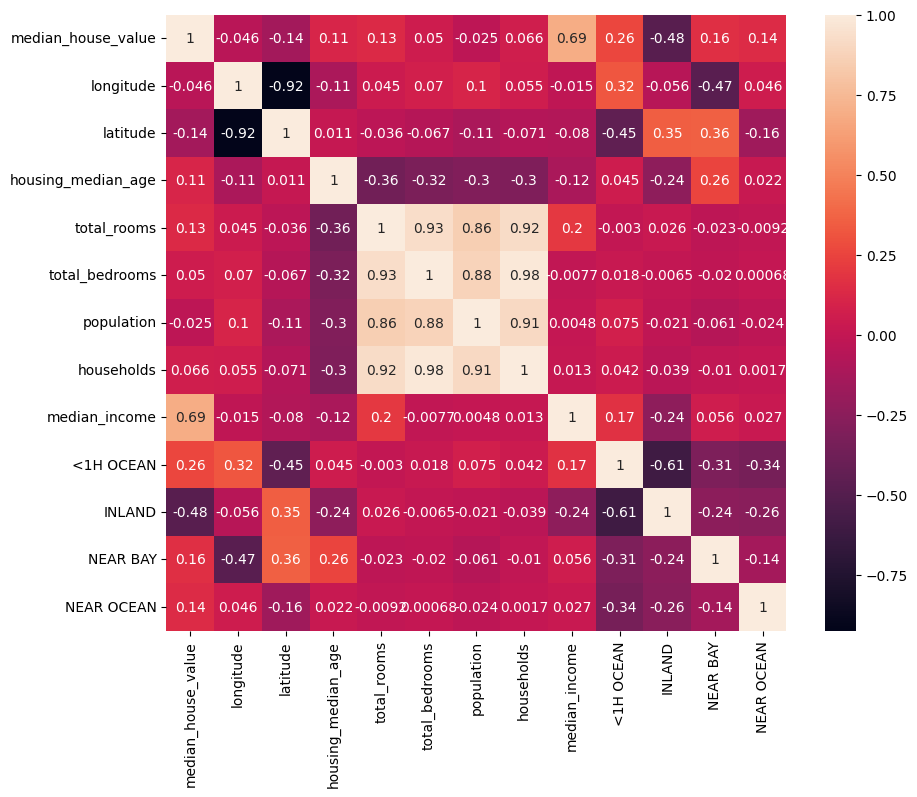

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### **Data cleaning:**

Previously, we noticed some missing values for 'total_bedrooms'. We could drop the column, but we would be losing a lot of data so here we could just drop the missing instances since there are only 207 out of 20640.

In [ ]:
df = df.dropna(subset = ['total_bedrooms'])

### **Feature engineering:**

In [ ]:
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['avg_household_rooms'] = df['total_rooms']/df['households']

<ipython-input-141-5bfa574d52d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
<ipython-input-141-5bfa574d52d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_household_rooms'] = df['total_rooms']/df['households']


We have total rooms and bedrooms but their ratio might also be a variable of interest, so, we compute that and add that to the dataset.

Since we can have more rooms depending on how many houses there are on a block, we can get more information by calculating how many rooms per household we might have on average.

In [ ]:
df.corr()['median_house_value']

median_house_value     1.000000
longitude             -0.045398
latitude              -0.144638
housing_median_age     0.106432
total_rooms            0.133294
total_bedrooms         0.049686
population            -0.025300
households             0.064894
median_income          0.688355
<1H OCEAN              0.257614
INLAND                -0.484787
NEAR BAY               0.160526
NEAR OCEAN             0.140378
bedroom_ratio         -0.255880
avg_household_rooms    0.151344
Name: median_house_value, dtype: float64

We can see here that the '*households*' feature was not really interesting.Moreover, the covariance between it and 'population' is *very* high which means it is actually not bringing more useful information.


These new variables are more correlated with the target variable and do provide a little bit more insight.

Since we have these new improved features, we can remove the less correlated features which more or less give us the same information. I am going to drop '*total_bedrooms*' and '*households*'

In [ ]:
df = df.drop(['households', 'total_bedrooms'], axis='columns')

# **Scaling the data:**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
selected_columns = ['housing_median_age', 'total_rooms', 'population', 'median_income']
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

Here, we picked only the columns that had continuous data and scaled them so that every column had data in the range 0-1. This ensures that we can fairly make comparisions between variables. Moreover, variables with larger scales can dominate the learning process and have a disproportionate impact on the model. By scaling the variables, you prevent this bias and ensure that each variable contributes proportionately to the model training. We did not scale latitude and longitude or the dummy variables here.

# **Split into X values and y values:**

In [ ]:
X_values = df.drop('median_house_value', axis = 1)
y_values = df['median_house_value']

# **Selecting Models**

## 1. Multivariate Linear Regression:
Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable. It is widely used for regression problems when the dependent and independent features demonstrate a linear relationship, which seems to be the case for most variables here. It is especially suitable when there is a reasonably strong correlation between the features and the target variable, as indicated by the moderate correlation coefficient for "median_income" (0.688355). Linear regression also provides interpretable coefficients for each feature, allowing us to understand the direction and magnitude of their impact on the target variable.

In [ ]:
from sklearn.linear_model import LinearRegression
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# 2. Decision Tree Regression:
Decision trees can capture non-linear relationships and interactions between features. With the provided features, decision tree regression can handle both numerical and categorical features. By one-hot encoding the 'ocean_proximity' variable, we have transformed it into separate dummy variables ('< 1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'), which can be effectively used as inputs to the decision tree regression. Decision trees are also robust to outliers and missing data which is the case for some of our data.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
def decision_tree_regression(X_train, y_train, X_test):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# 3. Random Forest Regression:
Random forests are an ensemble of decision trees that combine multiple individual tree predictions to provide a more robust and accurate prediction. Random forests operates by constructing a multitude of decision trees attraining time. For regression tasks, the mean or average prediction of the individual trees is returned. They can handle a large number of features and capture complex interactions. Random forests can also handle both numerical and categorical features, making them suitable for this dataset.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_regression(X_train, y_train, X_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# 4. Gradient Boosting Regression:
Gradient Boosting is another ensemble method that combines multiple weak learners, typically Decision Trees, to create a strong predictive model. It sequentially adds new models to correct the errors made by the previous models. Gradient Boosting is known for its high predictive accuracy and can handle both numerical and categorical features.Gradient boosting is also often robust to outliers, which is good for datasets like this one.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
def gradient_boosting_regression(X_train, y_train, X_test):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Baseline Model:

We are using a ZeroR model as our baseline here.

In [ ]:
from sklearn.dummy import DummyRegressor
def baseline_model(X_train, y_train, X_test):
    model = DummyRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


# **Training and Testing Models:**

Here, we use K-fold cross-validation for train-test splits. K-fold cross-validation allows for a more comprehensive assessment of a model's performance by repeatedly partitioning the data into training and validation subsets. This helps to evaluate the model's ability to generalize to unseen data by simulating the process of training on one part of the dataset and testing on another. Moreover, K-fold cross-validation provides a more robust estimate of the model's performance compared to a single train-test split. It reduces the impact of data variability and randomness by averaging the evaluation metrics across multiple folds. This reduces the risk of overfitting or underfitting due to a specific train-test split.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold

X_values = X_values.values
y_values = y_values.values
models = [
    ("Linear Regression", linear_regression),
    ("Decision Tree Regression", decision_tree_regression),
    ("Random Forest Regression", random_forest_regression),
    ("Gradient Boosting Regression", gradient_boosting_regression),
    ("ZeroR Baseline Regression", baseline_model)
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model_func in models:
    rmse_scores = []

    for train_index, test_index in kf.split(X_values, y_values):
        X_train, X_test = X_values[train_index], X_values[test_index]
        y_train, y_test = y_values[train_index], y_values[test_index]
        y_pred = model_func(X_train, y_train, X_test)

        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    rmse_scores = np.array(rmse_scores)
    print("Model: ", model_name)
    print("Average RMSE: ", np.mean(rmse_scores))
    print("Minimum RMSE: ", np.min(rmse_scores))
    print("Maximum RMSE: ", np.max(rmse_scores))
    print("-------------------------------------")


Model:  Linear Regression
Average RMSE:  69018.6929271945
Minimum RMSE:  65767.91803444685
Maximum RMSE:  70534.58912076426
-------------------------------------
Model:  Decision Tree Regression
Average RMSE:  69610.0628448912
Minimum RMSE:  67071.3339017017
Maximum RMSE:  71370.45060983257
-------------------------------------
Model:  Random Forest Regression
Average RMSE:  48767.48068828992
Minimum RMSE:  47405.2099183099
Maximum RMSE:  50455.66251482345
-------------------------------------
Model:  Gradient Boosting Regression
Average RMSE:  55599.39125910485
Minimum RMSE:  53215.68332292261
Maximum RMSE:  56957.054381109294
-------------------------------------
Model:  ZeroR Baseline Regression
Average RMSE:  115423.84484594707
Minimum RMSE:  112390.77186534423
Maximum RMSE:  118521.99857004687
-------------------------------------


## **Results:**
The random forest regression model outperforms the other models in terms of average RMSE, with the lowest average RMSE score of approximately $48,783. This indicates that, on average, the random forest model has the smallest deviation between its predictions and the actual values.
The linear regression model has the highest average RMSE, indicating that it has the largest average deviation between its predictions and the actual values.
The performance of the decision tree and gradient boosting models falls between the linear regression and random forest models in terms of average RMSE.

While the RMSE values look very large, we have to understand that this is in the same units (dollars) , so, we are on average off by $48,767.48 when predicting the median house value for a house in california given these features by using Random Forest. This is not ideal, but in relative terms, the model is doing moderately well.

##**Conclusion:**

Linear Regression Model's performance is typically influenced by the linearity assumption and the presence of outliers or non-linear relationships. In comparison to more advanced models, linear regression may have limitations in capturing complex patterns and interactions in the data. On the other hand, Decision trees are capable of capturing non-linear relationships and interactions between features, however, they can be prone to overfitting, resulting in poor generalization to unseen data. So, it makes sense that these models are outperformed by the other two.

Random forest models are ensemble models that combine multiple decision trees to improve predictive accuracy and reduce overfitting. The random forest model's performance is often expected to be better than that of a single decision tree due to the ensemble effect.

Gradient Boosting models iteratively build an ensemble of weak learners, gradually reducing the model's error. They excel in capturing complex patterns and interactions, often achieving high prediction accuracy. Gradient boosting models are expected to outperform basic models like linear regression or decision trees in most cases, which is also true in this case.

This was expected because of the non-linear relationship we found between our target variable and the other features during the data exploration stage and also based on previous research where random forest was the best model for this particular dataset.

## **Citations:**

Chen, Yucong. (2023). "Analysis and Forecasting of California Housing." Highlights in Business, Economics and Management. 3. 128-135. 10.54097/hbem.v3i.4704.

Pace, R. Kelley, and Ronald Barry. (1997). ”Sparse spatial autoregressions.” Statistics & Probability Letters 33.3: 291-297